In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter

In [6]:
# (−𝑦 + 2300 m)/(10000 m), if 𝑦 < 2300 m
# (𝑦 − 8000 m)/(10000 m), if 𝑦 > 8000 m
# 0, otherwise
y = np.arange(0, 10000, 1)
r = np.zeros(y.shape)

for index, d_y in np.ndenumerate(y):
    if d_y < 2300:
        r[index] = (-d_y+2300)/10000
    elif d_y > 8000:
        r[index] = (d_y-8000)/10000

# fig, ax = plt.subplots()
pressure = (30*(1-r))

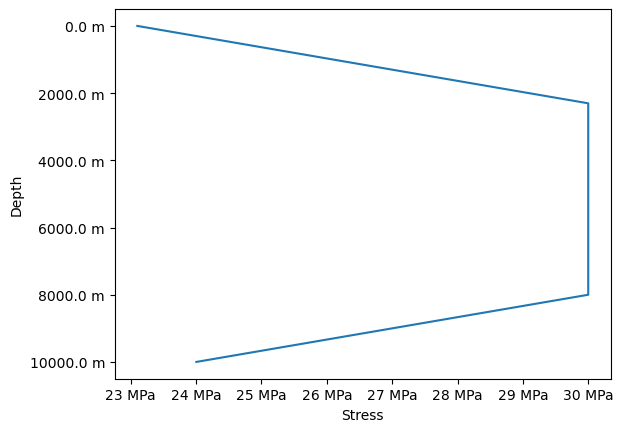

In [23]:
@ticker.FuncFormatter
def major_formatter(x, pos):
    label = str(-x)+" m" if x < 0 else str(x)+" m"
    return label

fig, ax = plt.subplots()
# plt.tight_layout()

ax.plot(pressure,-y)
ax.yaxis.set_major_formatter(major_formatter)
ax.xaxis.set_major_formatter(FormatStrFormatter('%d MPa'))
plt.xlabel("Stress")
plt.ylabel("Depth")
# plt.margins(0.2, 0.2)
plt.savefig("Stress.png",dpi=300,bbox_inches='tight')
plt.show()

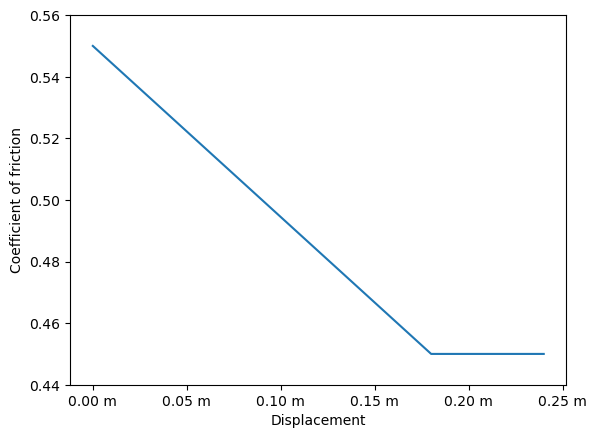

In [24]:
u_s = 0.550
u_d = 0.450
d0 = 0.18
# 𝐶0 = 0 MPa

distance = np.arange(0, 0.24,0.0001)
u = u_s+(u_d-u_s)*np.fmin(distance/d0,np.ones(distance.shape))

fig, ax = plt.subplots()
ax.plot(distance,u)
# ax.yaxis.set_major_formatter(major_formatter)

ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f m'))
# plt.tight_layout()
plt.margins(0.05, 0.1)
plt.xlabel("Displacement")
plt.ylabel("Coefficient of friction")
plt.savefig("Friction.png", dpi=300,bbox_inches='tight')
plt.show()